#Importing basic libraries and loading data sets

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

# To manage ticker in plot
from matplotlib.ticker import MaxNLocator

In [57]:
train_data=pd.read_csv('/Users/sam/Documents/ML/train.csv')
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
print('number of passenger in training data:'+str(len(train_data.index)))

number of passenger in training data:891


In [59]:
test_data=pd.read_csv('/Users/sam/Documents/ML/test.csv')
print('number of passenger in testing data:'+str(len(test_data.index)))

number of passenger in testing data:418


#Analyzing Data 

In [60]:
# Let pandas show all columns
pd.options.display.width = 0

# For better viusalisation increase horizontal space for subplots
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

# Seaborn theme setings
sns.set_theme(style = "whitegrid", palette="deep")

<Figure size 432x288 with 0 Axes>

In [61]:
#merging training and testing data for missing values imputation
len_train=len(train_data)
data_all=pd.concat(objs=[train_data,test_data],axis=0).reset_index(drop=True)
data_all.info()
print('number of passenger in all data:'+str(len(data_all.index)))
data_all.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
number of passenger in all data:1309


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
#check missing data
null_data=data_all.isnull().sum()
null_data[null_data>0]

Survived     418
Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [63]:
#Converting some columns to categories and category labels to discrete numbers
data_all["Cabin_Group"] = data_all["Cabin"].str[:1]
data_all["Cabin_Group"] = data_all["Cabin_Group"].astype('category')
cabin_group_categories = dict(enumerate(data_all["Cabin_Group"].cat.categories))

data_all["Cabin_Group"] = data_all["Cabin_Group"].cat.codes
data_all["Cabin_Group"] = data_all["Cabin_Group"].astype(int)

data_all["Sex"] = data_all["Sex"].astype('category')
sex_categories = dict(enumerate(data_all["Sex"].cat.categories))
data_all["Sex"] = data_all["Sex"].cat.codes
data_all["Sex"] = data_all["Sex"].astype(int)

data_all["Embarked"] = data_all["Embarked"].astype('category')
embarked_categories = dict(enumerate(data_all["Embarked"].cat.categories))
data_all["Embarked"] = data_all["Embarked"].cat.codes
data_all["Embarked"] = data_all["Embarked"].astype(int)

data_all = data_all.convert_dtypes()
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   Int64  
 1   Survived     891 non-null    Int64  
 2   Pclass       1309 non-null   Int64  
 3   Name         1309 non-null   string 
 4   Sex          1309 non-null   Int64  
 5   Age          1046 non-null   Float64
 6   SibSp        1309 non-null   Int64  
 7   Parch        1309 non-null   Int64  
 8   Ticket       1309 non-null   string 
 9   Fare         1308 non-null   Float64
 10  Cabin        295 non-null    string 
 11  Embarked     1309 non-null   Int64  
 12  Cabin_Group  1309 non-null   Int64  
dtypes: Float64(2), Int64(8), string(3)
memory usage: 145.9 KB


In [64]:
print('\nEmbarked:')
print(embarked_categories)
print('\nCabin Group:')
print(cabin_group_categories)
print('\nSex:')
print(sex_categories)


Embarked:
{0: 'C', 1: 'Q', 2: 'S'}

Cabin Group:
{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'T'}

Sex:
{0: 'female', 1: 'male'}


PLOTS and imputing missing data

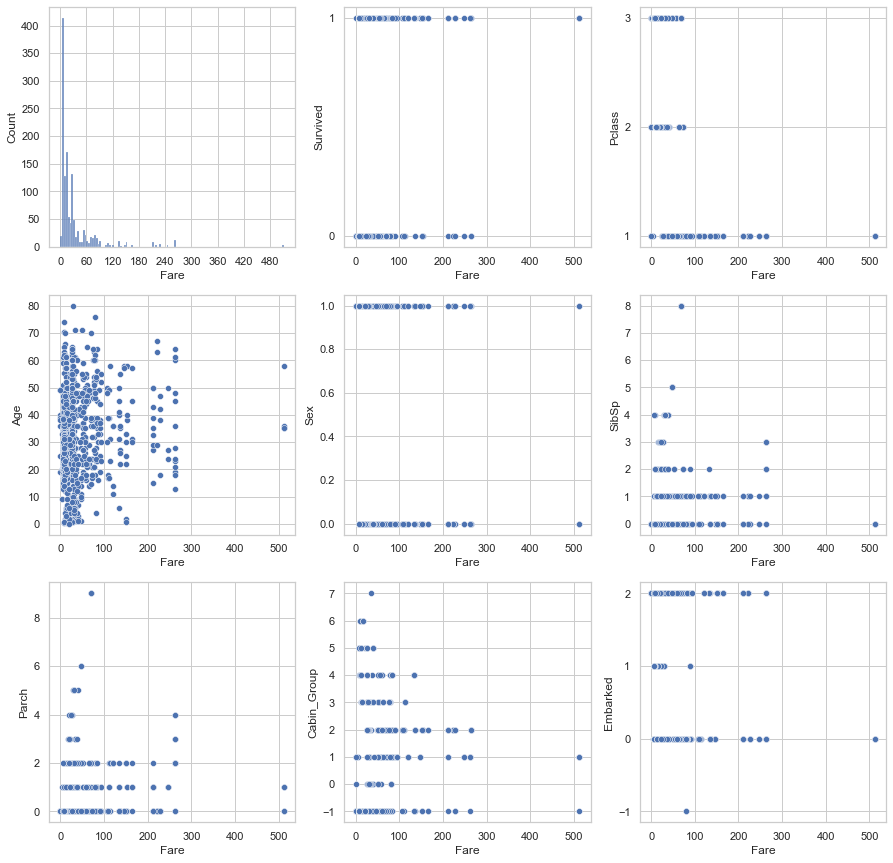

In [65]:
#fare
fig,axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

axes[0,0].xaxis.set_major_locator(MaxNLocator(integer=True))
axes[0,1].yaxis.set_major_locator(MaxNLocator(integer=True))
axes[0,2].yaxis.set_major_locator(MaxNLocator(integer=True))
axes[2,2].yaxis.set_major_locator(MaxNLocator(integer=True))

sns.histplot(ax=axes[0,0], data=data_all, x="Fare")
sns.scatterplot(ax=axes[0,1], data=data_all, x="Fare", y="Survived")
sns.scatterplot(ax=axes[0,2], data=data_all, x="Fare", y="Pclass")
sns.scatterplot(ax=axes[1,0], data=data_all, x="Fare", y="Age")
sns.scatterplot(ax=axes[1,1], data=data_all, x="Fare", y="Sex")
sns.scatterplot(ax=axes[1,2], data=data_all, x="Fare", y="SibSp")
sns.scatterplot(ax=axes[2,0], data=data_all, x="Fare", y="Parch")
sns.scatterplot(ax=axes[2,1], data=data_all, x="Fare", y="Cabin_Group")
sns.scatterplot(ax=axes[2,2], data=data_all, x="Fare", y="Embarked")

plt.show()

In [66]:
#checking the one missing fare data
data_all[data_all["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Group
1043,1044,<NA>,3,"Storey, Mr. Thomas",1,60.5,0,0,3701,<NA>,<NA>,2,-1


In [67]:
#filling the one missing fare data
m = data_all[data_all["Pclass"]==3]["Fare"].median()
data_all["Fare"] = data_all["Fare"].fillna(m)

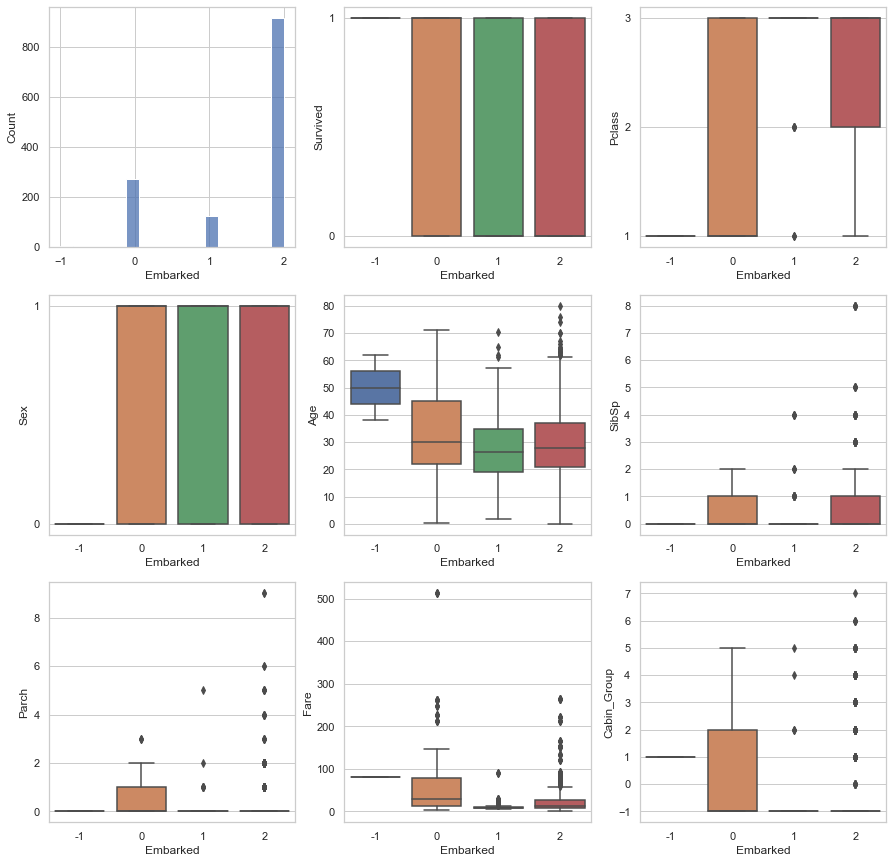

In [68]:
#embarked 
fig,axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

# Make ticks integer for discrete values
axes[0,0].xaxis.set_major_locator(MaxNLocator(integer=True))
axes[0,1].yaxis.set_major_locator(MaxNLocator(integer=True))
axes[0,2].yaxis.set_major_locator(MaxNLocator(integer=True))
axes[1,0].yaxis.set_major_locator(MaxNLocator(integer=True))

sns.histplot(ax=axes[0,0], data=data_all, x="Embarked")
sns.boxplot(ax=axes[0,1], data=data_all, x="Embarked",y="Survived")
sns.boxplot(ax=axes[0,2], data=data_all, x="Embarked",y="Pclass")
sns.boxplot(ax=axes[1,0], data=data_all, x="Embarked",y="Sex")
sns.boxplot(ax=axes[1,1], data=data_all, x="Embarked",y="Age")
sns.boxplot(ax=axes[1,2], data=data_all, x="Embarked",y="SibSp")
sns.boxplot(ax=axes[2,0], data=data_all, x="Embarked",y="Parch")
sns.boxplot(ax=axes[2,1], data=data_all, x="Embarked",y="Fare")
sns.boxplot(ax=axes[2,2], data=data_all, x="Embarked",y="Cabin_Group")

plt.show()

In [69]:
#checking missing embarked values
data_all[data_all["Embarked"]==-1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Group
61,62,1,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,B28,-1,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,B28,-1,1



Fare column shows us Embarked is "C" and and Pclass column confirms it Also we see that Cabin Names start with B belongs to port 0 (= C) We can fill missing Embarked value with "0"

Most frequent embarkation point is 2(=S).

Pclass at embarkation point 1(=Q) is 3 with some outliers. Embarkation point 2(=S) majors on Pclass 2 and 3.

The people at embarkation point 1(=Q) are somewhat younger than the others. Also most of them possibly do not have a family.

The embarkation point 0(=C) mostly consists of families with children. In every Pclass, there are children.

The people at embarkation point 0(=C) pays more for tickets.

Cabin_Group 0(=A) and 1(=B) mostly uses embarkation point 0(=C)

In [70]:
#imputing missing embarked values
data_all["Embarked"] = data_all["Embarked"].replace(-1,0)

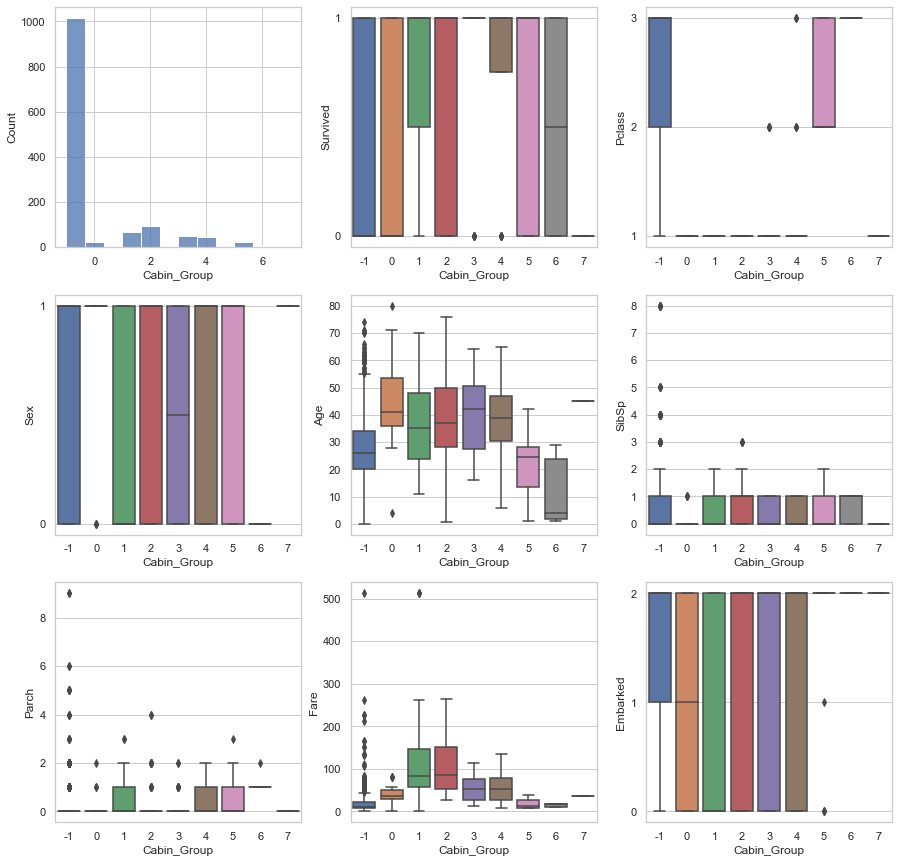

In [71]:
#cabin group
fig,axes = plt.subplots(nrows=3, ncols=3,figsize=(15,15))

axes[0,1].yaxis.set_major_locator(MaxNLocator(integer=True))
axes[0,2].yaxis.set_major_locator(MaxNLocator(integer=True))
axes[1,0].yaxis.set_major_locator(MaxNLocator(integer=True))
axes[2,2].yaxis.set_major_locator(MaxNLocator(integer=True))

sns.histplot(ax=axes[0,0], data=data_all, x="Cabin_Group")
sns.boxplot(ax=axes[0,1], data=data_all, x="Cabin_Group", y="Survived")
sns.boxplot(ax=axes[0,2], data=data_all, x="Cabin_Group", y="Pclass")
sns.boxplot(ax=axes[1,0], data=data_all, x="Cabin_Group", y="Sex")
sns.boxplot(ax=axes[1,1], data=data_all, x="Cabin_Group", y="Age")
sns.boxplot(ax=axes[1,2], data=data_all, x="Cabin_Group", y="SibSp")
sns.boxplot(ax=axes[2,0], data=data_all, x="Cabin_Group", y="Parch")
sns.boxplot(ax=axes[2,1], data=data_all, x="Cabin_Group", y="Fare")
sns.boxplot(ax=axes[2,2], data=data_all, x="Cabin_Group", y="Embarked")

plt.show()

A high amount of Cabin_Group data is missing.

Except missing data: Cabin_Group 1(=B), 3(=D), 4(=E) was mostly survived and Cabin_Group 7(=T) did not survive.

Missing Cabin_Group data mostly belongs to Pclass 2 and 3. While Cabin_Group 5(=F) belongs to Pclass 2 and 3, it is 3 for Cabin_Group 6(=G)

People at Cabin_Group 0(=A) and 7(=T) is male, it is female for Cabin_Group 6(=G)

Age range is mostly 20-35 for missing Cabin_Group data.

Cabin_Group 0(=A) consists of older people. Young ones is at Cabin_Group 5(=F) and Cabin_Group 6(=G)

Except Cabin_Group 0(=A) and 7(=T), SibSp is not descriptive for Cabin_Group. It is similar for Parch.

People at Cabin_Group 2(=C) pays more for tickets.

Missing Cabin_Group data majors on embarkation point 2(=S)

In [72]:
#imputing missing values in cabin group
missing_survived = len(data_all[(data_all['Cabin_Group']==-1) &(data_all["Survived"]==1)])
missing_not_survived = len(data_all[(data_all['Cabin_Group']==-1) &(data_all["Survived"]==0)])

cabin_null_count = len(data_all[(data_all['Cabin_Group']==-1)])
                               
print("Survived Percentage in Missing Cabin Values : ", '{:.0%}'.format(missing_survived / cabin_null_count))
print("Not-Survived Percentage in Missing Cabin Values : ", '{:.0%}'.format(missing_not_survived/ cabin_null_count))

Survived Percentage in Missing Cabin Values :  20%
Not-Survived Percentage in Missing Cabin Values :  47%


Since cabin_group gives good survival prediction so we will keep cabin_group and drop cabin

In [73]:
data_all = data_all.drop(['Cabin'], axis=1)

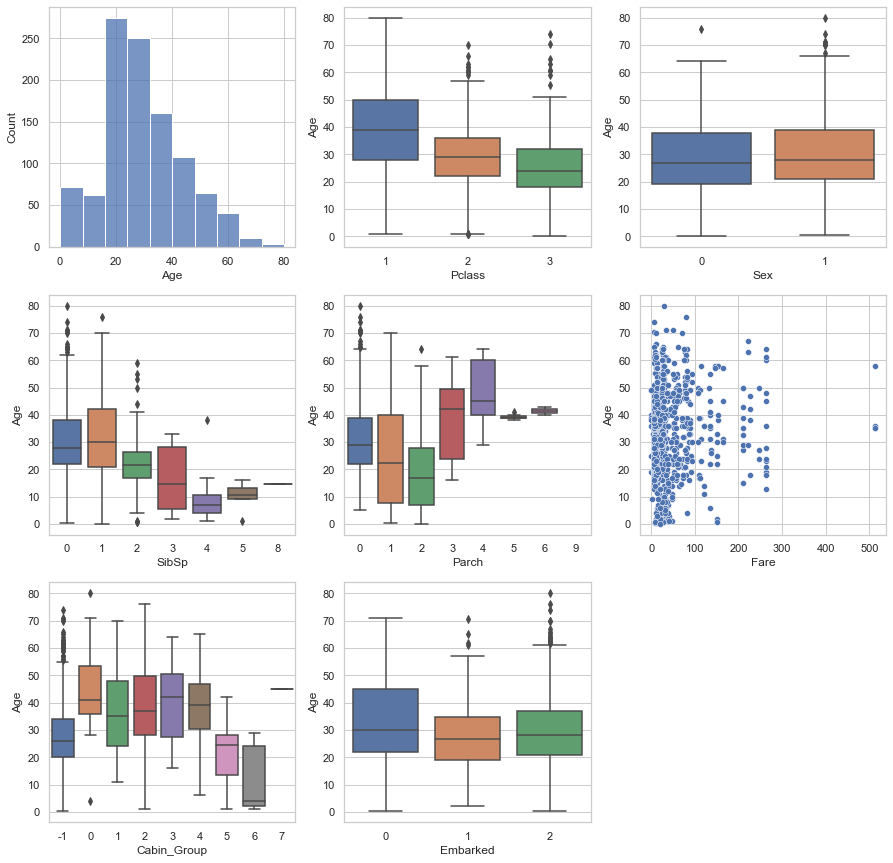

In [74]:
#age
fig,axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

sns.histplot(ax=axes[0,0], data=data_all, x="Age",bins=10)
sns.boxplot(ax=axes[0,1], data=data_all, x="Pclass", y="Age")
sns.boxplot(ax=axes[0,2], data=data_all, x="Sex", y="Age")
sns.boxplot(ax=axes[1,0], data=data_all, x="SibSp", y="Age")
sns.boxplot(ax=axes[1,1], data=data_all, x="Parch", y="Age")
sns.scatterplot(ax=axes[1,2], data=data_all, x="Fare", y="Age")
sns.boxplot(ax=axes[2,0], data=data_all, x="Cabin_Group", y="Age")
sns.boxplot(ax=axes[2,1], data=data_all, x="Embarked", y="Age")
fig.delaxes(axes[2,2])

plt.show()

In the light of the above inspection we will use Pclass, SibSp, Parch, Cabin_Group, Survived and Embarked features to impute Age feature using decision tree.

In [75]:
#imputing missing age
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

data_impute_dtree = data_all.copy()
data_impute_dtree = data_impute_dtree.drop(["Name", "PassengerId","Ticket", "Sex","Fare"], axis=1)

dtr = DecisionTreeRegressor()
imp = IterativeImputer(estimator=dtr, missing_values=np.nan, max_iter=500, verbose=0, imputation_order='roman', random_state=42, min_value=0)
x_imputed = imp.fit_transform(data_impute_dtree)

data_impute_dtree["MF_Age"] = x_imputed[:,2]
data_impute_dtree["MF_Age"] = data_impute_dtree["MF_Age"].astype(int)

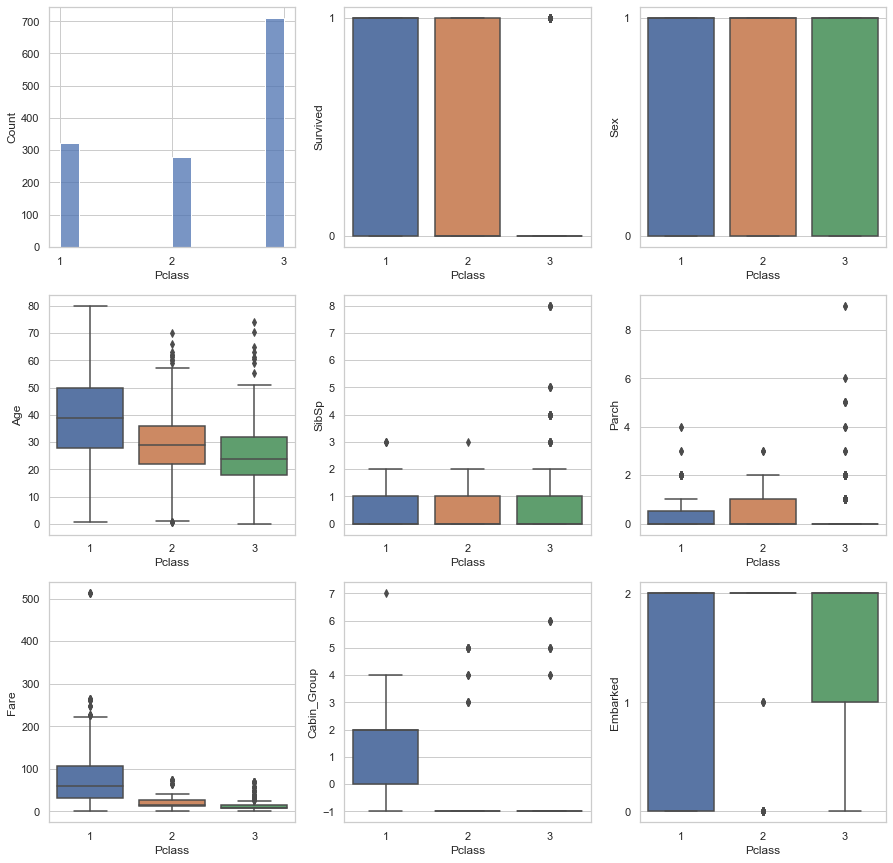

In [76]:
#Pclass
fig,axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

axes[0,0].xaxis.set_major_locator(MaxNLocator(integer=True))
axes[0,1].yaxis.set_major_locator(MaxNLocator(integer=True))
axes[0,2].yaxis.set_major_locator(MaxNLocator(integer=True))
axes[2,2].yaxis.set_major_locator(MaxNLocator(integer=True))

sns.histplot(ax=axes[0,0], data=data_all, x="Pclass")
sns.boxplot(ax=axes[0,1], data=data_all, x="Pclass", y="Survived")
sns.boxplot(ax=axes[0,2], data=data_all, x="Pclass", y="Sex")
sns.boxplot(ax=axes[1,0], data=data_all, x="Pclass", y="Age")
sns.boxplot(ax=axes[1,1], data=data_all, x="Pclass", y="SibSp")
sns.boxplot(ax=axes[1,2], data=data_all, x="Pclass", y="Parch")
sns.boxplot(ax=axes[2,0], data=data_all, x="Pclass", y="Fare")
sns.boxplot(ax=axes[2,1], data=data_all, x="Pclass", y="Cabin_Group")
sns.boxplot(ax=axes[2,2], data=data_all, x="Pclass", y="Embarked")

plt.show()

Pclass 3 mostly not survived.

Pclass 1 consists of older people. Younger people is at Pclass 3.

Families are mostly at Pclass 2.

Pclass 1 pays more for tickets.

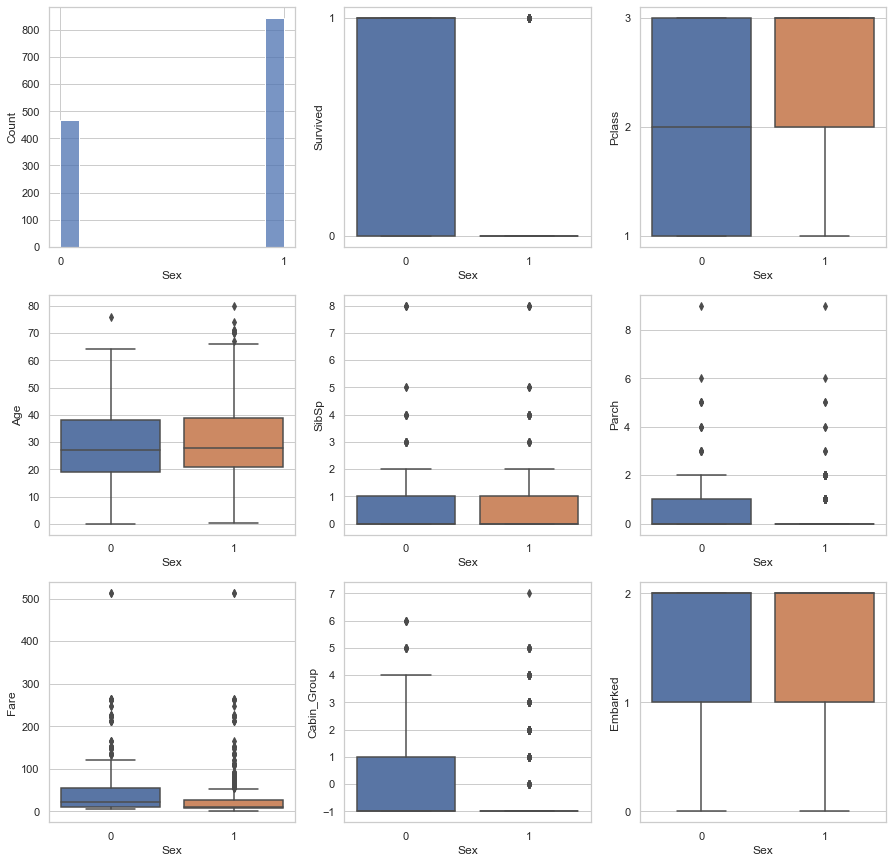

In [77]:
#sex vs others
fig,axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

axes[0,0].xaxis.set_major_locator(MaxNLocator(integer=True))
axes[0,1].yaxis.set_major_locator(MaxNLocator(integer=True))
axes[0,2].yaxis.set_major_locator(MaxNLocator(integer=True))
axes[2,2].yaxis.set_major_locator(MaxNLocator(integer=True))

sns.histplot(ax=axes[0,0], data=data_all, x="Sex")
sns.boxplot(ax=axes[0,1], data=data_all, x="Sex", y="Survived")
sns.boxplot(ax=axes[0,2], data=data_all, x="Sex", y="Pclass")
sns.boxplot(ax=axes[1,0], data=data_all, x="Sex", y="Age")
sns.boxplot(ax=axes[1,1], data=data_all, x="Sex", y="SibSp")
sns.boxplot(ax=axes[1,2], data=data_all, x="Sex", y="Parch")
sns.boxplot(ax=axes[2,0], data=data_all, x="Sex", y="Fare")
sns.boxplot(ax=axes[2,1], data=data_all, x="Sex", y="Cabin_Group")
sns.boxplot(ax=axes[2,2], data=data_all, x="Sex", y="Embarked")

plt.show()


The number of men is (about) twice the number of women.

The female mostly survived.

Males major at Pclass 2 and 3.

Females are slightly younger.

Mostly females have Sibling/Spouse/Children.

Females pay more for tickets.

Females mostly embarked at 1(=2) and 2(=S)

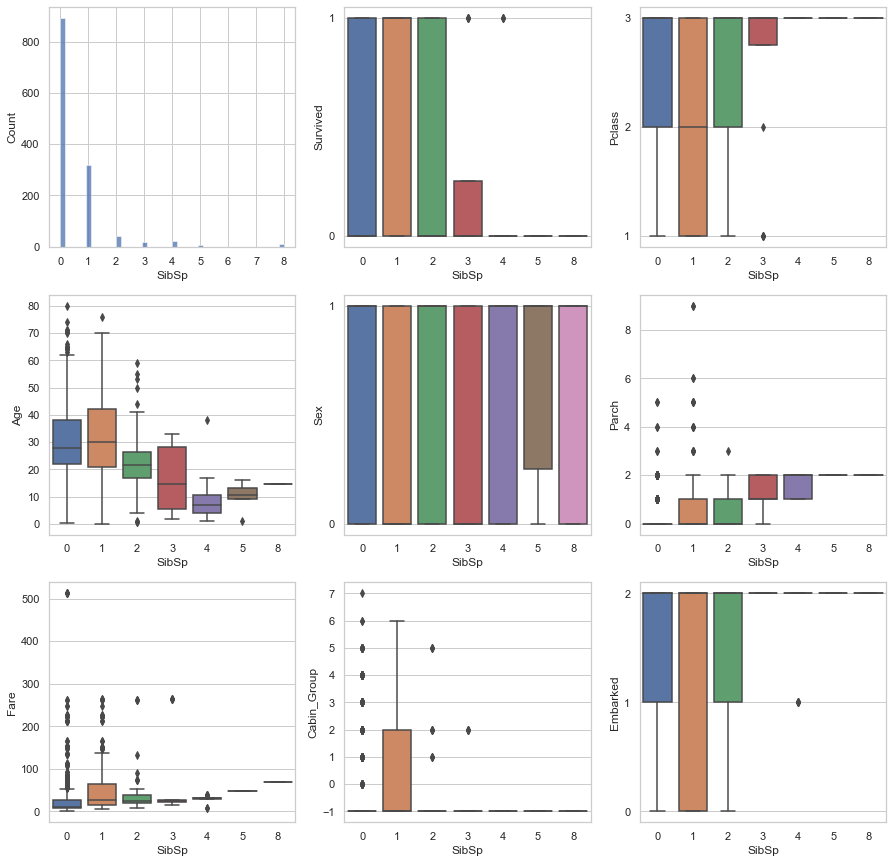

In [78]:
#SibSp(siblings or spouse on board)
fig,axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

axes[0,0].xaxis.set_major_locator(MaxNLocator(integer=True))
axes[0,1].yaxis.set_major_locator(MaxNLocator(integer=True))
axes[1,1].yaxis.set_major_locator(MaxNLocator(integer=True))
axes[0,2].yaxis.set_major_locator(MaxNLocator(integer=True))
axes[2,2].yaxis.set_major_locator(MaxNLocator(integer=True))

sns.histplot(ax=axes[0,0], data=data_all, x="SibSp")
sns.boxplot(ax=axes[0,1], data=data_all, x="SibSp", y="Survived")
sns.boxplot(ax=axes[0,2], data=data_all, x="SibSp", y="Pclass")
sns.boxplot(ax=axes[1,0], data=data_all, x="SibSp", y="Age")
sns.boxplot(ax=axes[1,1], data=data_all, x="SibSp", y="Sex")
sns.boxplot(ax=axes[1,2], data=data_all, x="SibSp", y="Parch")
sns.boxplot(ax=axes[2,0], data=data_all, x="SibSp", y="Fare")
sns.boxplot(ax=axes[2,1], data=data_all, x="SibSp", y="Cabin_Group")
sns.boxplot(ax=axes[2,2], data=data_all, x="SibSp", y="Embarked")

plt.show()

Most people have no sibling/spouse. If they have it is probably one.

More than 2 SibSp dramatically decreases survival possibility.

There are more survivors at PClass 1 (Middle aged, embarked at 1(=Q))

More than 2 sibling/spouse means you are young (The more siblings the less age.)

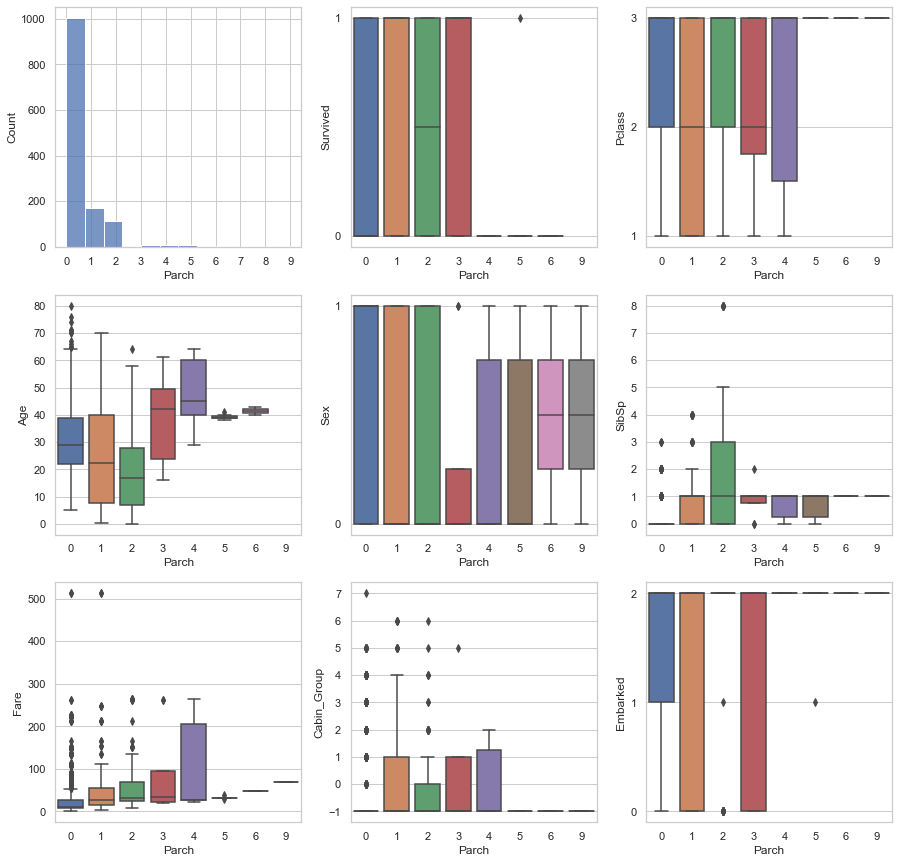

In [79]:
#Parch(parents or children on board)
fig,axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

axes[0,0].xaxis.set_major_locator(MaxNLocator(integer=True))
axes[0,1].yaxis.set_major_locator(MaxNLocator(integer=True))
axes[1,1].yaxis.set_major_locator(MaxNLocator(integer=True))
axes[0,2].yaxis.set_major_locator(MaxNLocator(integer=True))
axes[2,2].yaxis.set_major_locator(MaxNLocator(integer=True))

sns.histplot(ax=axes[0,0], data=data_all, x="Parch")
sns.boxplot(ax=axes[0,1], data=data_all, x="Parch", y="Survived")
sns.boxplot(ax=axes[0,2], data=data_all, x="Parch", y="Pclass")
sns.boxplot(ax=axes[1,0], data=data_all, x="Parch", y="Age")
sns.boxplot(ax=axes[1,1], data=data_all, x="Parch", y="Sex")
sns.boxplot(ax=axes[1,2], data=data_all, x="Parch", y="SibSp")
sns.boxplot(ax=axes[2,0], data=data_all, x="Parch", y="Fare")
sns.boxplot(ax=axes[2,1], data=data_all, x="Parch", y="Cabin_Group")
sns.boxplot(ax=axes[2,2], data=data_all, x="Parch", y="Embarked")

plt.show()

Parch has some relation with Age. It has certain characteristics. More Parent/Children means paying more to tickets.

In [80]:
data_final = data_impute_dtree.copy()
data_final["Age"] = data_final["MF_Age"]
data_final = data_final.drop("MF_Age", axis=1)
data_final["Name"] = data_all["Name"]
data_final["Sex"] = data_all["Sex"]
data_final["Fare"] = data_all["Fare"]

#Feature Engineering

Pclass:

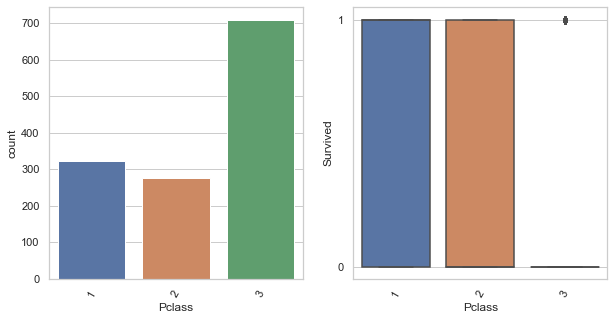

In [81]:
#Pclass
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[1].yaxis.set_major_locator(MaxNLocator(integer=True))

axes[0].tick_params('x', labelrotation=60)
axes[1].tick_params('x', labelrotation=60)

sns.countplot(ax=axes[0], x="Pclass", data=data_final)
sns.boxplot(ax=axes[1], data=data_final, x="Pclass", y="Survived")

plt.show()

Pclass is a good feature to predict survival.

Name:

In [82]:
data_final["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: string

In [83]:
data_final["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in data_final["Name"]]

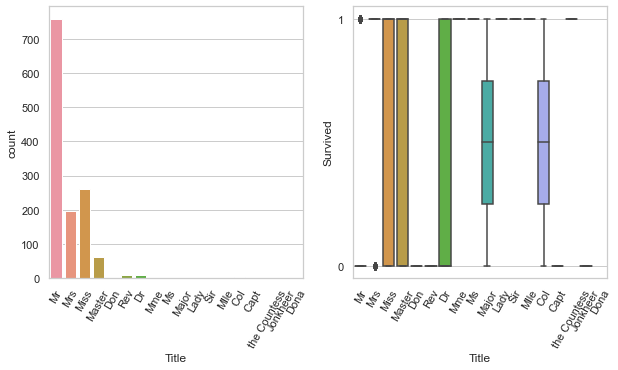

In [84]:
#plotting titles in the name
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[1].yaxis.set_major_locator(MaxNLocator(integer=True))

axes[0].tick_params('x', labelrotation=60)
axes[1].tick_params('x', labelrotation=60)

sns.countplot(ax=axes[0], x="Title", data=data_final)
sns.boxplot(ax=axes[1], data=data_final, x="Title", y="Survived")

plt.show()

In [85]:
data_final["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

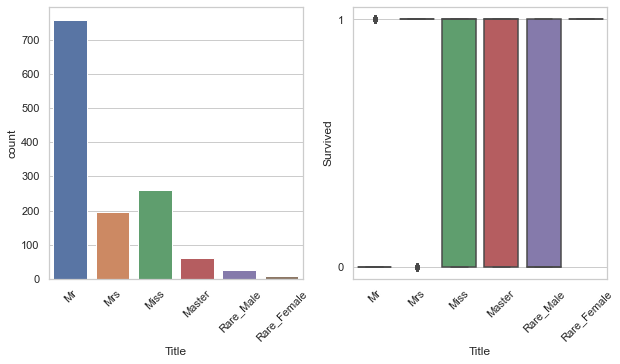

In [86]:
data_final["Title"] = data_final["Title"].replace(["Capt", "Col", "Don", "Dr", "Major", "Rev", "Sir", "Jonkheer"], "Rare_Male")
data_final["Title"] = data_final["Title"].replace(["Lady", "the Countess", "Dona", "Mme", "Ms", "Mlle"], "Rare_Female")

fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[1].yaxis.set_major_locator(MaxNLocator(integer=True))

axes[0].tick_params('x', labelrotation=45)
axes[1].tick_params('x', labelrotation=45)

sns.countplot(ax=axes[0], x="Title", data=data_final)
sns.boxplot(ax=axes[1], data=data_final, x="Title", y="Survived")

plt.show()

The title in the name gives good prediction of survival so we can use it.

In [87]:
#converting titles to categories and discrete values
data_final["Title"] = data_final["Title"].astype('category')
title_categories = dict(enumerate(data_final["Title"].cat.categories))
data_final["Title"] = data_final["Title"].cat.codes
data_final["Title"]  =data_final["Title"].astype(int)

data_final.drop(labels=["Name"], axis=1, inplace=True)
data_final["Embarked"] = data_final["Embarked"].astype('category')

title_categories

{0: 'Master', 1: 'Miss', 2: 'Mr', 3: 'Mrs', 4: 'Rare_Female', 5: 'Rare_Male'}

Sex:

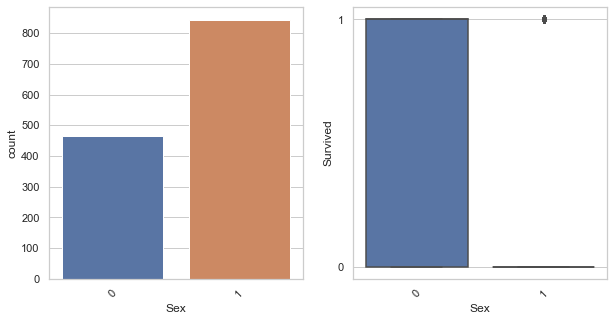

In [88]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[1].yaxis.set_major_locator(MaxNLocator(integer=True))

axes[0].tick_params('x', labelrotation=45)
axes[1].tick_params('x', labelrotation=45)

sns.countplot(ax=axes[0], x="Sex", data=data_final)
sns.boxplot(ax=axes[1], data=data_final, x="Sex", y="Survived")

plt.show()

Sex of the people is a good feature to predict survival.

Age:

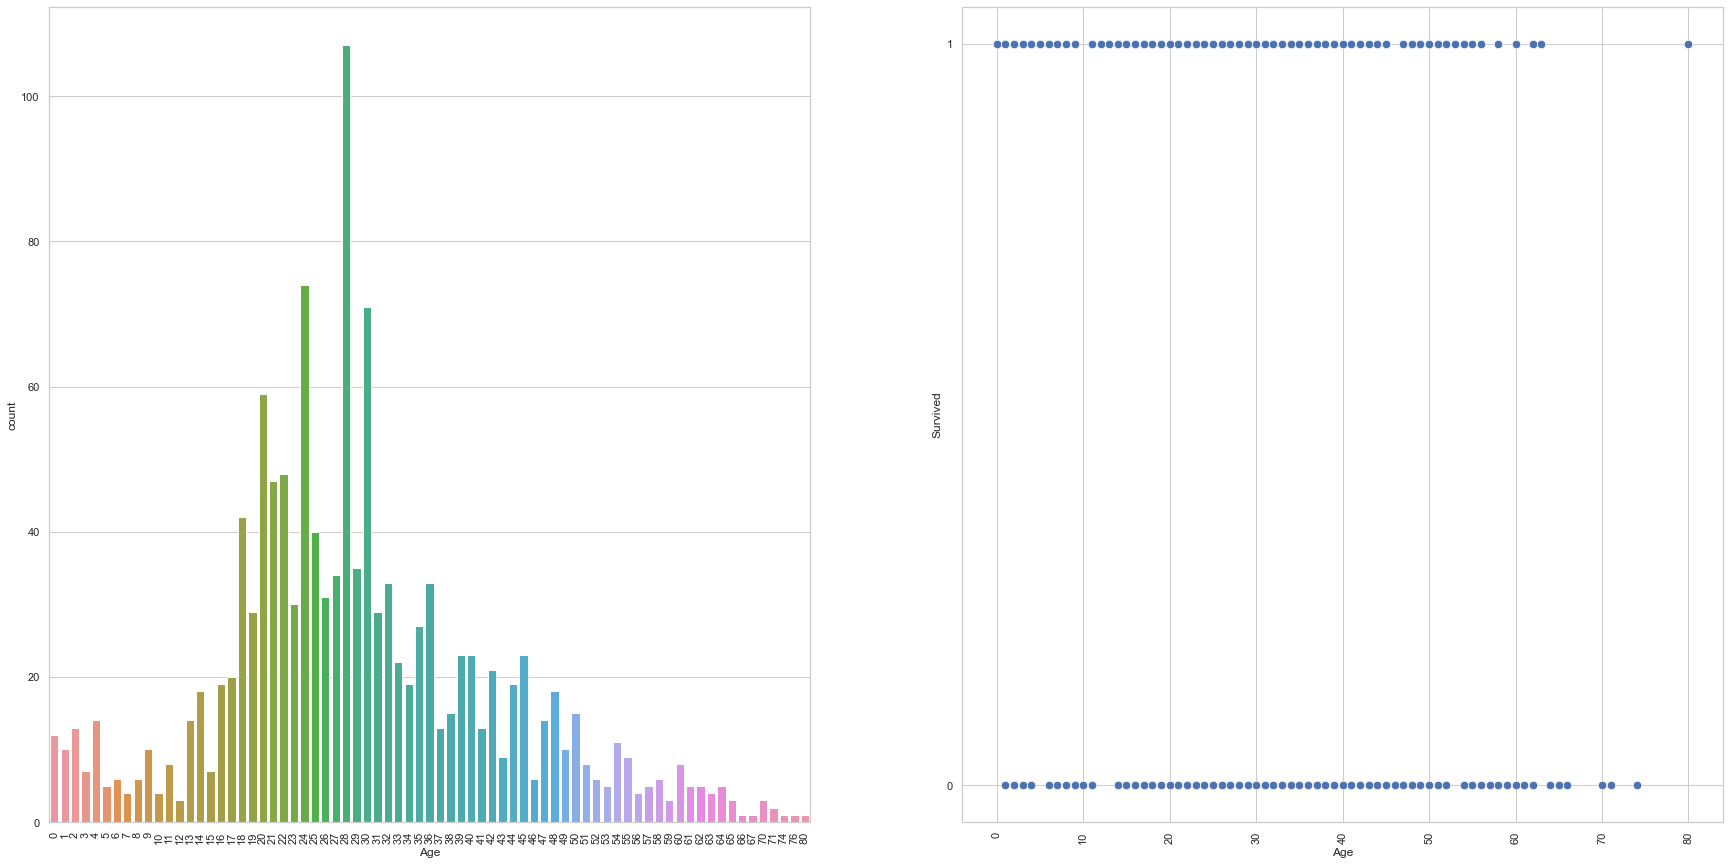

In [89]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(30,15))
axes[1].yaxis.set_major_locator(MaxNLocator(integer=True))

axes[0].tick_params('x', labelrotation=90)
axes[1].tick_params('x', labelrotation=90)

sns.countplot(ax=axes[0], x="Age", data = data_final)
sns.scatterplot(ax=axes[1], data=data_final, x="Age", y="Survived",s=70)

plt.show()

Age can be used to predict survival.

Parch+SibSp=Fmly_count:

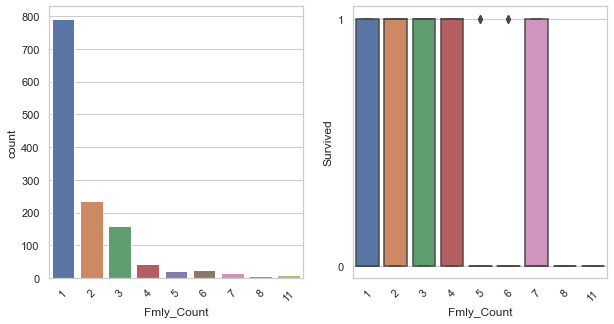

In [90]:
data_final["Fmly_Count"] = data_final["SibSp"] + data_final["Parch"] + 1

fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[1].yaxis.set_major_locator(MaxNLocator(integer=True))

axes[0].tick_params('x', labelrotation=45)
axes[1].tick_params('x', labelrotation=45)

sns.countplot(ax=axes[0], x="Fmly_Count", data=data_final)
sns.boxplot(ax=axes[1], data=data_final, x="Fmly_Count", y="Survived")

plt.show()

Fmly_count can be used to predict survival.

Fare:

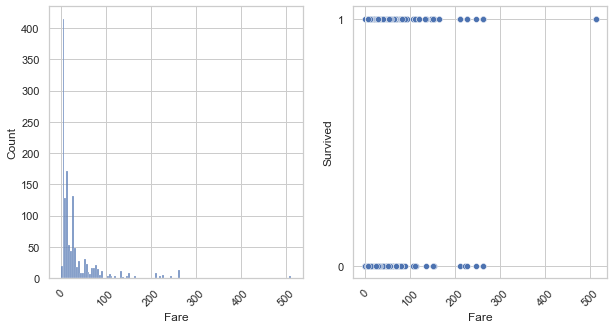

In [91]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[1].yaxis.set_major_locator(MaxNLocator(integer=True))

axes[0].tick_params('x', labelrotation=45)
axes[1].tick_params('x', labelrotation=45)

sns.histplot(ax=axes[0], x="Fare", data=data_final)
sns.scatterplot(ax=axes[1], data=data_final,x ="Fare",y="Survived")

plt.show()

Fare can be used to predict

Cabin_group:

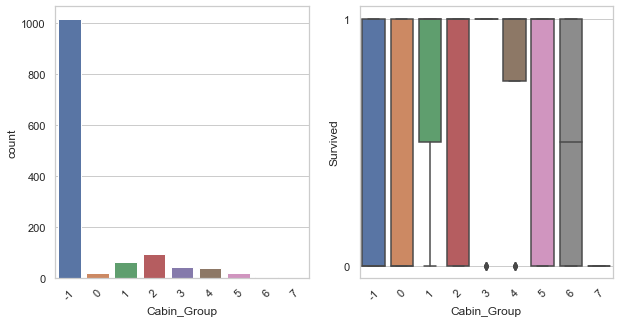

In [92]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[1].yaxis.set_major_locator(MaxNLocator(integer=True))

axes[0].tick_params('x', labelrotation=45)
axes[1].tick_params('x', labelrotation=45)

sns.countplot(ax=axes[0], x="Cabin_Group", data=data_final)
sns.boxplot(ax=axes[1], data=data_final, x="Cabin_Group", y="Survived")

plt.show()

Cabin_group can be used for prediction

Embarked:

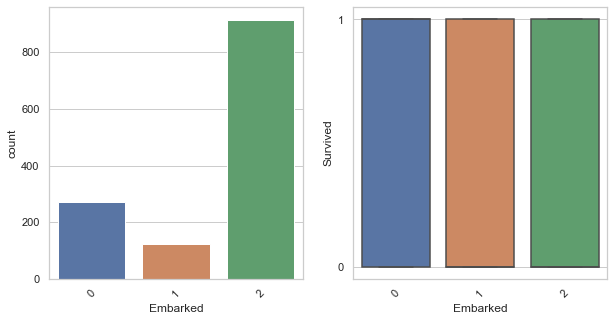

In [93]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[1].yaxis.set_major_locator(MaxNLocator(integer=True))

axes[0].tick_params('x', labelrotation=45)
axes[1].tick_params('x', labelrotation=45)

sns.countplot(ax=axes[0], x="Embarked", data=data_final)
sns.boxplot(ax=axes[1], data=data_final, x="Embarked", y="Survived")

plt.show()

Embarked doesn't gives us some meaningful insight to predict

#Training and testing data



In [94]:
#get dummies
data_final = pd.get_dummies(data_final, columns=["Pclass", "Title", "Sex", "Fmly_Count", "Cabin_Group", "Embarked"])

In [95]:
#dropping unnecessary
data_final.drop(labels=['SibSp','Parch'],axis=1,inplace=True)

In [96]:
data_final.head(5)

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Title_0,Title_1,Title_2,Title_3,...,Cabin_Group_1,Cabin_Group_2,Cabin_Group_3,Cabin_Group_4,Cabin_Group_5,Cabin_Group_6,Cabin_Group_7,Embarked_0,Embarked_1,Embarked_2
0,0,22,7.25,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,38,71.2833,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,1,26,7.925,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,35,53.1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,0,35,8.05,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [97]:
#splitting of testing and training data
train_data = data_final[:len_train]
test_data = data_final[len_train:]

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    Int64  
 1   Age             891 non-null    int64  
 2   Fare            891 non-null    Float64
 3   Pclass_1        891 non-null    uint8  
 4   Pclass_2        891 non-null    uint8  
 5   Pclass_3        891 non-null    uint8  
 6   Title_0         891 non-null    uint8  
 7   Title_1         891 non-null    uint8  
 8   Title_2         891 non-null    uint8  
 9   Title_3         891 non-null    uint8  
 10  Title_4         891 non-null    uint8  
 11  Title_5         891 non-null    uint8  
 12  Sex_0           891 non-null    uint8  
 13  Sex_1           891 non-null    uint8  
 14  Fmly_Count_1    891 non-null    uint8  
 15  Fmly_Count_2    891 non-null    uint8  
 16  Fmly_Count_3    891 non-null    uint8  
 17  Fmly_Count_4    891 non-null    uin

In [98]:
x_train=train_data.drop('Survived',axis=1)
from sklearn.preprocessing import StandardScaler
x_train = StandardScaler().fit_transform(x_train)
#y_train=pd.DataFrame( train_data["Survived"])
#y_train=y_train.to_records()
y_train = train_data["Survived"]
y_train = y_train.astype('int')



In [99]:
print(y_train)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(x_train), y_train, test_size=0.33, random_state=42)

#Prediction using KNN

In [101]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn_mod = KNeighborsClassifier()
knn_mod.fit(x_train,y_train)

y_prediction_train=knn_mod.predict(x_train)
y_prediction_test=knn_mod.predict(x_test)

a=confusion_matrix(y_train,y_prediction_train)
print(a)
# outcome values order in sklearn
tp, fn, fp, tn =a.reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_train,y_prediction_train,labels=[1,0])
print('Classification report : \n',matrix)

b=confusion_matrix(y_test,y_prediction_test)
print(b)
# outcome values order in sklearn
tp, fn, fp, tn =b.reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_prediction_test,labels=[1,0])
print('Classification report : \n',matrix)


[[350  24]
 [ 57 165]]
Outcome values : 
 350 24 57 165
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.74      0.80       222
           0       0.86      0.94      0.90       374

    accuracy                           0.86       596
   macro avg       0.87      0.84      0.85       596
weighted avg       0.86      0.86      0.86       596

[[148  27]
 [ 39  81]]
Outcome values : 
 148 27 39 81
Classification report : 
               precision    recall  f1-score   support

           1       0.75      0.68      0.71       120
           0       0.79      0.85      0.82       175

    accuracy                           0.78       295
   macro avg       0.77      0.76      0.76       295
weighted avg       0.77      0.78      0.77       295



#Prediction using logistic regression

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

accuracy_train = round(logreg.score(x_train, y_train) * 100, 2) 
accuracy_test = round(logreg.score(x_test, y_test) * 100, 2)

print("Training Accuracy: % {}".format(accuracy_train))
print("Testing Accuracy: % {}".format(accuracy_test))


y_prediction_train=logreg.predict(x_train)
y_prediction_test=logreg.predict(x_test)

a=confusion_matrix(y_train,y_prediction_train)
print(a)
# outcome values order in sklearn
tp, fn, fp, tn =a.reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_train,y_prediction_train,labels=[1,0])
print('Classification report : \n',matrix)

b=confusion_matrix(y_test,y_prediction_test)
print(b)
# outcome values order in sklearn
tp, fn, fp, tn =b.reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_prediction_test,labels=[1,0])
print('Classification report : \n',matrix)



Training Accuracy: % 85.23
Testing Accuracy: % 83.73
[[335  39]
 [ 49 173]]
Outcome values : 
 335 39 49 173
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.78      0.80       222
           0       0.87      0.90      0.88       374

    accuracy                           0.85       596
   macro avg       0.84      0.84      0.84       596
weighted avg       0.85      0.85      0.85       596

[[154  21]
 [ 27  93]]
Outcome values : 
 154 21 27 93
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.78      0.79       120
           0       0.85      0.88      0.87       175

    accuracy                           0.84       295
   macro avg       0.83      0.83      0.83       295
weighted avg       0.84      0.84      0.84       295



In [103]:
#prediction by sklearn
x_test1 = test_data.drop("Survived", axis=1)
x_test1 = StandardScaler().fit_transform(x_test1)

y_predict=logreg.predict(x_test1)
test_data["Survived"] = y_predict.tolist()

test_data = pd.read_csv('/Users/sam/Documents/ML/test.csv')
test_data.set_index("PassengerId")
test_data["Survived"] = y_predict.tolist()
test_data[["PassengerId","Survived"]].to_csv("submission1.csv", index=False)

/var/folders/l2/tq_sfhyj76988knrq9ghdflm0000gn/T/ipykernel_2428/2294351978.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Survived"] = y_predict.tolist()


In [104]:
df=pd.read_csv("/Users/sam/Documents/ML/submission1.csv")
df.head(100)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
95,987,0
96,988,1
97,989,0
98,990,1
